# Dataset

In [1]:
#data 물리식에 넣기
#물리식에 집어 넣고
#csv file 만들기 - (x, y)
#lstm을 기반으로 한 모델에 넣기 
#비교

In [297]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt


def mph2mps(mph):
  # convert mph to meter per second
  return (mph * 5280 * .3048 / 60 / 60)

def yard2meter(yard):
  # convert yard to meter
  return yard / 1.094

# index: [ball_speed, launch_angle, spin rate, max_height, Carry]
pga_tour_average = {
     1:[mph2mps(167), 10.9, 2686, yard2meter(32), yard2meter(275)],
     2:[mph2mps(158), 9.2, 3655, yard2meter(30), yard2meter(243)],
     3:[mph2mps(152), 9.4, 4350, yard2meter(31), yard2meter(230)],
     4:[mph2mps(146), 10.2, 4437, yard2meter(29), yard2meter(225)],
     5:[mph2mps(142), 10.4, 4630, yard2meter(27), yard2meter(212)],
     6:[mph2mps(137), 11.0, 4836, yard2meter(28), yard2meter(203)],
     7:[mph2mps(132), 12.1, 5361, yard2meter(31), yard2meter(194)],
     8:[mph2mps(127), 14.1, 6231, yard2meter(30), yard2meter(183)],
     9:[mph2mps(120), 16.3, 7097, yard2meter(32), yard2meter(172)],
     10:[mph2mps(115), 18.1, 7998, yard2meter(31), yard2meter(160)],
     11:[mph2mps(109), 20.4, 7998, yard2meter(30), yard2meter(148)],
     12:[mph2mps(102), 24.2, 9304, yard2meter(29), yard2meter(136)]

}


cl = {13.7: [-0.06268752565831914,0.055642777549703815,0.34289220573573387,0.3912245616092897,0.40737082869039926,0.4861527183156411]
     ,21.6: [0.11171661486129825, 0.1589027036537446, 0.3184203272535334, 0.36117969620550106, 0.38180898481027503,0.4529329658084568]
     ,29.9: [0.17064952202216876, 0.23448771333059615, 0.2906328074599729, 0.3311911324848981, 0.3474218520907863, 0.39066330420503176]
     ,38.4: [0.13164565128144956, 0.18782593396281733, 0.23167878716790796, 0.2767271714268958, 0.3074159873321211, 0.3483684241393465]
     ,46.9: [0.1667647058823527, 0.12731394053134704, 0.20291038648759585, 0.23234736965573854, 0.26519852208081623, 0.3106128672805114]
     ,55.2: [0.1162101929505599, 0.1455697613043222, 0.17845962113658997, 0.20681367661720707, 0.23408480441029833, 0.27395783238519716]
     ,63.1: [0.11398803589232298, 0.1400108498035304, 0.16513019764236692, 0.1890329012961115, 0.21630754794440193, 0.25287197231833886]
     ,71.9: [0.11619611752976344, 0.13446601372353506, 0.15290481496686392, 0.1756999589466891, 0.1963046155650694, 0.23286552108380731]
     ,80.2: [0.10731452700721356, 0.12563368717377266, 0.14624186264735206, 0.16458213594510585, 0.18408627059996463, 0.21619582429183026]
     ,89.1: [0.10955779719664527, 0.12563368717377266, 0.14402322444431392, 0.15457187261744154, 0.17186440677966086, 0.20286991965280599]}
cldf = pd.DataFrame(data=cl,index=[1011.55,1881.78,2799.63,3673.1,4603.46,6184.94])


cd = {13.7: [0.5283926090053684, 0.39232153720998514, 0.36138035297043397, 0.42054484067716585, 0.4004768655573524, 0.473749211429599, 0.51704056729298]
     ,21.6: [0.3287531384750698, 0.25231105572189483, 0.2701728602519771, 0.3565051964857509, 0.37547556590903014, 0.42817412758471945, 0.44884590759456]
     ,29.9: [0.2430412613754353, 0.24372916171980696, 0.26911150420594293, 0.30765162680844305, 0.3717865317093115, 0.3407635750023533, 0.387970736134859975]
     ,38.4: [0.24087134043620406, 0.23933873893367008, 0.250660432101454, 0.2696240574037101, 0.2995047286123549, 0.3305647779849409, 0.35644281336628586]
     ,45.9: [0.24957547163183835, 0.2430412613754353, 0.2350292455998122, 0.2665006863548166, 0.2800395093089944, 0.30453584289570074, 0.3347705804580663]
     ,55.2: [0.24575745611755, 0.2343615776185103, 0.24849051116222276, 0.2588789865834142, 0.2637785905068066, 0.2871663592003158, 0.314213656564067]
     ,63.1: [0.24259699240302862, 0.2517209451323603, 0.2484938832227344, 0.25778053787175204, 0.2670334719156535, 0.28282314526134167, 0.29465401956638104]
     ,71.9: [0.24304800549645855, 0.24365497638855121, 0.24632059022299152, 0.25561736105354405, 0.26485680685539886, 0.27739834291326354, 0.285974335809456]
     ,80.2: [0.23978637996658836, 0.23825715052456614, 0.2484938832227344, 0.2556106169325208, 0.26269363003719093, 0.2730652451558243, 0.285974335809456]
     ,88.9: [0.2408645963151808, 0.23053091687730326, 0.24957547163183835, 0.25670906564418294, 0.2605371973400062, 0.2676438148682578, 0.27512473111329977]}
cddf = pd.DataFrame(data=cd,index=[3.24,1031.94,1876.39,2803.78,3685.811,4617,6193])

def find_nearest(velocity,spin,data):
     LowSpin = 0
     HighSpin = 6200
     LowVel = 0
     HighVel = 90

     for values in data.index:
          if spin > values:
               LowSpin = values
          if spin < values and values < HighSpin:
               HighSpin = values

     for elements in data.columns:
          if velocity > elements:
               LowVel = elements
          if velocity < elements and elements < HighVel:
               HighVel = elements

     if HighSpin == 6200 and max(data.index) == 6184.94:
       HighSpin = 6184.94
     elif HighSpin == 6200 and max(data.index) == 6193:
       HighSpin = 6193
     #print(type(spin))

     if HighVel == 90 and max(data.columns) == 89.1:
       HighVel = 89.1
     elif HighVel == 90 and max(data.columns) == 88.9:
       HighVel = 88.9
     
     return LowSpin,HighSpin,LowVel,HighVel


def interpolate_cl(velocity, spin):
     y1,y2,x1,x2 = find_nearest(velocity,spin,cldf)
     f11 = cldf[x1][y1]
     f12 = cldf[x1][y2]
     f21 = cldf[x2][y1]
     f22 = cldf[x2][y2]

     return (1/((x2-x1)*(y2-y1)+1)) * (f11*(x2-velocity)*(y2-spin) + f21*(velocity-x1)*(y2-spin)
                         + f12*(x2-velocity)*(spin-y1) + f22*(velocity-x1)*(spin-y1))
 
def interpolate_cd(velocity, spin):
     y1,y2,x1,x2 = find_nearest(velocity,spin,cddf)
     f11 = cddf[x1][y1]
     f12 = cddf[x1][y2]
     f21 = cddf[x2][y1]
     f22 = cddf[x2][y2]
     #print(x2,x1,y1,y2,f11,f12,velocity,spin,f22,f21)
     return (1/((x2-x1)*(y2-y1)+1)) * (f11*(x2-velocity)*(y2-spin) + f21*(velocity-x1)*(y2-spin)
                         + f12*(x2-velocity)*(spin-y1) + f22*(velocity-x1)*(spin-y1))    
    

def forceDrag(rho, v, C_D, area):
    '''define a function to calculate the force of drag on an object'''
    force = 0.5 * rho * v ** 2 * C_D * area
    return force

def forceLift(rho, v, C_l, area):
    '''define a function to calculate the force of drag on an object'''
    force = 0.5 * rho * v ** 2 * C_l * area
    return force

In [298]:
def liftTrajectory(u, theta_deg, theta_xz, spin_axis, spin_RPM):
    '''define a function to find the path of a ball with drag and lift caused
    by its rotation and the Magnus effect'''
    
    '''initialise variables'''
    interval = 0.033
    g = - 9.81
    rho = 1.225
    area = 0.00138
    
    '''convert angles to radians'''
    theta_rad = np.radians(theta_deg)     #launch angle
    theta_rad_xz = np.radians(theta_xz)   #theta_xz(치는 방향) to radian(방향 각도)
    theta_spin = np.radians(spin_axis)    #커브가 도는 방향 (- => 오른쪽)
    '''find the magnitude of the lift force'''
    lift_mag = 0.285 * (1-np.exp(-0.00026*spin_RPM))    #lift_coef를 구하는 또 다른 방법
    
    
    s_x = 0
    s_y = 0
    s_z = 0
    
    v_x = u * np.cos(theta_rad) * np.cos(theta_rad_xz)    #u는 모든 힘의 벡터 => x벡터의 길이만 뽑아낸거임
    v_y = u * np.sin(theta_rad)
    v_z = u * np.cos(theta_rad) * np.sin(theta_rad_xz)

    # coef 구하는 부분
    C_l = interpolate_cl(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)  #스핀이랑 속도의 크기 벡터
    C_D = interpolate_cd(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)
    #print('ggg')
    '''mass in kg'''
    m = 0.045
    
    #가속도 구하는 부분  F = ma => a = F/m
    a_x = (-1) * forceDrag(rho, v_x, C_D, area) / m
    a_y = (-1) * forceDrag(rho, v_y, C_D, area) / m + g
    a_z = (-1) * forceDrag(rho, v_z, C_D, area) / m

    
    '''intialise arrays'''
    x_array = np.array([0])
    y_array = np.array([0])
    z_array = np.array([0])
    t_array = np.array([0])
    
    count = 0 
    #C_l = 0.25
    while s_y >= 0:

        #print(v_z, a_z)
        try:
            C_l = interpolate_cl(np.sqrt(v_x**2 + v_y**2 + v_z**2),spin_RPM)
            C_D = interpolate_cd(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)
            #C_D = 1.5

        except:
            C_l = 0.3
            C_D = 0.3
        #print(C_l, C_D, lift_mag)

        count = count + 1
        time = count * interval     #몇 프레임으로 뽑을지 
        
        '''find the next point's position '''
        s_x = s_x + v_x * interval + 0.5 * a_x * interval ** 2    #각 프레임에서의 위치
        s_y = s_y + v_y * interval + 0.5 * a_y * interval ** 2
        s_z = s_z + v_z * interval + 0.5 * a_z * interval ** 2
        
        #print(s_z)
        '''find the new velocity at the next point'''
        v_x = v_x + a_x * interval            #원래 속도에 가속도만큼 더해짐 
        v_y = v_y + a_y * interval
        v_z = v_z + a_z * interval
        #v_z = (-1) * (v_z + a_z * interval)
        #print('here', v_z, a_z)
        #v_z = 0
        
        '''find the components of lift'''
        theta_i = np.arctan(v_y/v_x)          #그때 그때 v_x와 v_y가 이루는 각도
        theta_z = np.arctan(v_z/v_x)

        if theta_spin < 0:
          direction = -1
        else:
          direction = 1


        l_x = (-1) * forceLift(rho, v_y, C_l, area)
        l_y = forceLift(rho, v_x, C_l, area) * np.cos(theta_spin)
        l_z = (-1) * forceLift(rho, v_z, C_l, area)* np.cos(theta_spin) + l_y * np.sin(theta_spin)
        #print('llll', l_z)

        d_x = (-1) * forceDrag(rho, v_x, C_D, area)
        d_y = (-1) * forceDrag(rho, v_y, C_D, area)
        d_z = (-1) * forceDrag(rho, v_z, C_D, area)
        #print('d_z', d_z)

        #print(l_x, l_y)
        '''find the new acceleration'''

        a_x = d_x / m + l_x / m
        a_y = d_y / m + g + l_y / m
        #a_z = d_z / m + l_z / m
        a_z = l_z / m

        '''append data to arrays'''
        x_array = np.append(x_array, s_x)
        y_array = np.append(y_array, s_y)
        z_array = np.append(z_array, s_z)
        t_array = np.append(t_array, time)
        #print(s_x, s_y)
        #print(x_array, y_array)
        
    return x_array, y_array, z_array, t_array 

In [299]:
def data_loader(data_list):
  dict = {}
  list = []
  names = ['angle', 'speed', 'spin', 'spin_axis', 'xz_theta']
  for i in range(len(data_list)):
    list.append(data_list[i])
    dict[names[i]] = list[i]
  return dict

{'angle': 16.26037669224695, 'speed': 83.0250300180182, 'spin': 4970.258008130012, 'spin_axis': -3.118248153265186, 'xz_theta': -2.4217377411630636}
Distance travelled by dimpled ball with drag and lift : 247.30256569776483 m
Height of the golf ball:  93.05410238785497 m


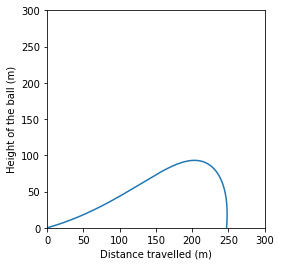

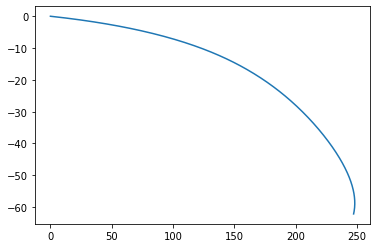

In [300]:
#data 물리식에 넣기
import random

speed = random.uniform(14, 89)
angle = random.uniform(1, 25)
spin = random.uniform(2650, 6000)    #스핀량
spin_axis = random.uniform(-7, 7)    #스핀의 축 - magnus force가 달라짐
'''범위 수정'''
xz_theta = random.uniform(-5, 5)   #어느 방향으로 치는지(음수일 경우, 왼쪽 방향)

golf_df = data_loader([angle, speed, spin, spin_axis, xz_theta])
print(golf_df)

initial_velocity, launch_angle, spin_rate , spin_axis, xz_theta = golf_df['speed'], golf_df['angle'], golf_df['spin'], golf_df['spin_axis'], golf_df['xz_theta']

x_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[0]
y_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[1]
z_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[2]

print("Distance travelled by dimpled ball with drag and lift :", x_values_lift_dimpled[-1], "m")
print("Height of the golf ball: ", np.max(y_values_lift_dimpled), "m")

#print(f'Real distance: {}m, Real Height: {pga_tour_average[idx][3]}m')
plt.xlim(0,300)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
plt.ylim(0,300)
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('Distance travelled (m)')
plt.ylabel('Height of the ball (m)')

plt.plot(x_values_lift_dimpled, y_values_lift_dimpled)
plt.show()


plt.figure()
plt.plot(x_values_lift_dimpled, z_values_lift_dimpled)
plt.show()

### test 표본
- initial_velocity = 75    launch_angle = 17    spin_rate = 4283     spin_axis = -7     xz_theta = 12  
- {'angle': 22, 'speed': 60, 'spin': 4508, 'spin_axis': 6, 'xz_theta': -3}


- 솟는 경우: {'angle': 17, 'speed': 75, 'spin': 4283, 'spin_axis': -7, 'xz_theta': -12}

- 갑자기 꺾이는 경우: {'angle': 8, 'speed': 83, 'spin': 4639, 'spin_axis': 2, 'xz_theta': -24}

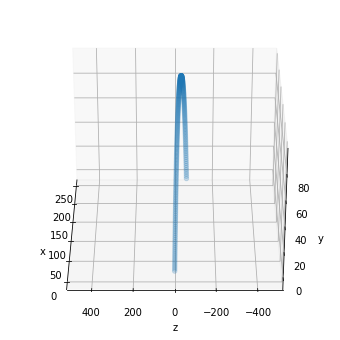

In [301]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111, projection='3d')
ax.view_init(30,180)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')

# z 축
ax.set_ylim(ymin= -500, ymax= 500)

ax.scatter(x_values_lift_dimpled, z_values_lift_dimpled, y_values_lift_dimpled, alpha=0.2)

In [302]:
pwd

'/home/ines/github/DL_projects/lstm_short_game_golf'

In [306]:
ls

lstm_model.ipynb  train_30/


In [283]:
rm -rf train_30

In [284]:
mkdir train_30

In [285]:
#spin_rate까지 데이터셋에 추가 
import random
count = 0
while True:
  speed = random.uniform(14, 89)
  angle = random.uniform(1, 25)
  spin = random.uniform(2650, 6000)
  spin_axis = random.uniform(-7, 7)
  xz_theta = random.uniform(-5, 5)

  golf_df = data_loader([angle, speed, spin, spin_axis, xz_theta])
  #print(golf_df)

  initial_velocity, launch_angle, spin_rate , spin_axis, xz_theta = golf_df['speed'], golf_df['angle'], golf_df['spin'], golf_df['spin_axis'], golf_df['xz_theta']

  x_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[0]
  y_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[1]
  #z_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[2]

  with open('/home/ines/github/DL_projects/lstm_short_game_golf/train_30/set{}.txt'.format(count), 'a') as file:
    for x,y in zip(x_values_lift_dimpled[0:30], y_values_lift_dimpled[0:30]):
      file.write('{},{},{}\n'.format(x,y,spin_rate))

      
  count += 1
  print(count)

  # 5000
  if count > 5000:
    break

file.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062


3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704


# Padding part

In [286]:
import os

under = []
for i in range(count):
  with open('/home/ines/github/DL_projects/lstm_short_game_golf/train_30/set{}.txt'.format(i), 'r') as file:
    if (file.read().count('\n') + 1) < 31:
      under.append(i)

In [287]:
under

[9,
 21,
 28,
 47,
 53,
 54,
 57,
 88,
 94,
 127,
 130,
 137,
 161,
 172,
 177,
 190,
 217,
 229,
 237,
 277,
 281,
 290,
 306,
 307,
 327,
 334,
 340,
 351,
 391,
 393,
 400,
 423,
 452,
 454,
 458,
 460,
 477,
 479,
 484,
 499,
 522,
 529,
 532,
 534,
 551,
 556,
 563,
 568,
 579,
 593,
 597,
 612,
 621,
 643,
 644,
 646,
 647,
 657,
 662,
 666,
 672,
 690,
 691,
 696,
 698,
 721,
 736,
 746,
 747,
 756,
 763,
 769,
 775,
 791,
 807,
 816,
 827,
 841,
 868,
 871,
 881,
 889,
 892,
 897,
 906,
 915,
 936,
 944,
 950,
 961,
 963,
 976,
 981,
 1000,
 1032,
 1034,
 1035,
 1036,
 1050,
 1082,
 1083,
 1089,
 1090,
 1091,
 1099,
 1121,
 1122,
 1124,
 1135,
 1136,
 1144,
 1146,
 1147,
 1155,
 1170,
 1188,
 1191,
 1197,
 1205,
 1213,
 1214,
 1221,
 1237,
 1266,
 1271,
 1287,
 1296,
 1320,
 1333,
 1336,
 1345,
 1362,
 1365,
 1366,
 1378,
 1381,
 1388,
 1391,
 1399,
 1416,
 1425,
 1426,
 1434,
 1460,
 1475,
 1478,
 1495,
 1500,
 1519,
 1532,
 1535,
 1538,
 1545,
 1564,
 1579,
 1588,
 1594,
 159

In [288]:
data = pd.read_csv('/home/ines/github/DL_projects/lstm_short_game_golf/train_30/set7.txt',
                                   sep= ',', names = ['x', 'y', 'spin_rate'])

In [289]:
data

,x,y,spin_rate
0,0.000000,0.000000,4180.749552
1,1.716543,0.474417,4180.749552
2,3.417243,0.943134,4180.749552
3,5.101887,1.412272,4180.749552
4,6.770701,1.881687,4180.749552
5,8.423912,2.351232,4180.749552
6,10.061743,2.820761,4180.749552
7,11.684413,3.290130,4180.749552
8,13.292138,3.759196,4180.749552
9,14.885131,4.227821,4180.749552


30 이하의 txt file에 padding 넣어주기

In [290]:
import csv

for i in under:
    df = pd.read_csv('/home/ines/github/DL_projects/lstm_short_game_golf/train_30/set{}.txt'.format(i),
                      sep= ',', names = ['x', 'y', 'spin_rate'])
    
    print(i,len(df))
  
    df_length = len(df)
    for turn in range(0, 30 - df_length):
        f = open('/home/ines/github/DL_projects/lstm_short_game_golf/train_30/set{}.txt'.format(i),'a', newline='')
        wr = csv.writer(f)
        wr.writerow([0.0, 0.0, df['spin_rate'][0]])
        
    f.close()

9 25
21 11
28 29
47 27
53 9
54 6
57 25
88 29
94 6
127 15
130 14
137 29
161 29
172 6
177 17
190 19
217 23
229 23
237 6
277 8
281 14
290 20
306 17
307 12
327 25
334 17
340 14
351 27
391 13
393 9
400 14
423 18
452 27
454 28
458 25
460 6
477 6
479 10
484 14
499 18
522 25
529 14
532 15
534 16
551 9
556 25
563 21
568 20
579 27
593 18
597 20
612 8
621 14
643 27
644 19
646 11
647 25
657 29
662 15
666 18
672 4
690 19
691 23
696 27
698 5
721 8
736 11
746 7
747 22
756 5
763 5
769 27
775 21
791 18
807 22
816 28
827 11
841 21
868 17
871 28
881 10
889 17
892 12
897 21
906 17
915 5
936 10
944 12
950 21
961 17
963 11
976 20
981 10
1000 16
1032 20
1034 10
1035 11
1036 22
1050 7
1082 20
1083 6
1089 14
1090 16
1091 6
1099 27
1121 27
1122 26
1124 18
1135 28
1136 21
1144 23
1146 6
1147 27
1155 12
1170 13
1188 15
1191 28
1197 29
1205 19
1213 28
1214 27
1221 16
1237 5
1266 14
1271 15
1287 8
1296 17
1320 22
1333 29
1336 26
1345 16
1362 29
1365 24
1366 20
1378 23
1381 9
1388 24
1391 12
1399 21
1416 19
1425 9
1

In [291]:
df = pd.read_csv('/home/ines/github/DL_projects/lstm_short_game_golf/train_30/set535.txt',
                sep= ',', names = ['x', 'y', 'spin_rate'])
len(df)

30

In [292]:
df

,x,y,spin_rate
0,0.000000,0.000000,5988.527609
1,1.110730,0.501697,5988.527609
2,2.212373,0.995042,5988.527609
3,3.304252,1.484056,5988.527609
4,4.386504,1.968662,5988.527609
5,5.459269,2.448781,5988.527609
6,6.522682,2.924335,5988.527609
7,7.576879,3.395249,5988.527609
8,8.621994,3.861451,5988.527609
9,9.658158,4.322870,5988.527609


# Make a data array

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch.autograd import Variable

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import os

In [7]:
path = '/home/ines/github/DL_projects/lstm_short_game_golf/train_30'
file = 'set1.txt'
file = os.path.join(path, file)
base = pd.read_csv(file, sep=',', names = ['x','y','spin_rate'])
base_arr = base.to_numpy()
base_arr = np.expand_dims(base_arr, axis=0)

In [8]:
base_arr.shape

(1, 30, 3)

In [9]:
import os

path = '/home/ines/github/DL_projects/lstm_short_game_golf/train_30'
for i in range(2, 5001):
    file = 'set{}.txt'.format(i)
    file = os.path.join(path, file)
    
    df = pd.read_csv(file, sep= ',', names = ['x', 'y', 'spin_rate'])
    df_arr = df.to_numpy()
    #print(df_arr.shape)
    df_expand = np.expand_dims(df_arr, axis=0)
    #print(i, df_expand.shape)
    
    base_arr = np.concatenate((base_arr, df_expand), axis=0)
    #print(i, total_arr.shape)
    print(base_arr.shape)

(2, 30, 3)
(3, 30, 3)
(4, 30, 3)
(5, 30, 3)
(6, 30, 3)
(7, 30, 3)
(8, 30, 3)
(9, 30, 3)
(10, 30, 3)
(11, 30, 3)
(12, 30, 3)
(13, 30, 3)
(14, 30, 3)
(15, 30, 3)
(16, 30, 3)
(17, 30, 3)
(18, 30, 3)
(19, 30, 3)
(20, 30, 3)
(21, 30, 3)
(22, 30, 3)
(23, 30, 3)
(24, 30, 3)
(25, 30, 3)
(26, 30, 3)
(27, 30, 3)
(28, 30, 3)
(29, 30, 3)
(30, 30, 3)
(31, 30, 3)
(32, 30, 3)
(33, 30, 3)
(34, 30, 3)
(35, 30, 3)
(36, 30, 3)
(37, 30, 3)
(38, 30, 3)
(39, 30, 3)
(40, 30, 3)
(41, 30, 3)
(42, 30, 3)
(43, 30, 3)
(44, 30, 3)
(45, 30, 3)
(46, 30, 3)
(47, 30, 3)
(48, 30, 3)
(49, 30, 3)
(50, 30, 3)
(51, 30, 3)
(52, 30, 3)
(53, 30, 3)
(54, 30, 3)
(55, 30, 3)
(56, 30, 3)
(57, 30, 3)
(58, 30, 3)
(59, 30, 3)
(60, 30, 3)
(61, 30, 3)
(62, 30, 3)
(63, 30, 3)
(64, 30, 3)
(65, 30, 3)
(66, 30, 3)
(67, 30, 3)
(68, 30, 3)
(69, 30, 3)
(70, 30, 3)
(71, 30, 3)
(72, 30, 3)
(73, 30, 3)
(74, 30, 3)
(75, 30, 3)
(76, 30, 3)
(77, 30, 3)
(78, 30, 3)
(79, 30, 3)
(80, 30, 3)
(81, 30, 3)
(82, 30, 3)
(83, 30, 3)
(84, 30, 3)
(85, 30, 3)


(809, 30, 3)
(810, 30, 3)
(811, 30, 3)
(812, 30, 3)
(813, 30, 3)
(814, 30, 3)
(815, 30, 3)
(816, 30, 3)
(817, 30, 3)
(818, 30, 3)
(819, 30, 3)
(820, 30, 3)
(821, 30, 3)
(822, 30, 3)
(823, 30, 3)
(824, 30, 3)
(825, 30, 3)
(826, 30, 3)
(827, 30, 3)
(828, 30, 3)
(829, 30, 3)
(830, 30, 3)
(831, 30, 3)
(832, 30, 3)
(833, 30, 3)
(834, 30, 3)
(835, 30, 3)
(836, 30, 3)
(837, 30, 3)
(838, 30, 3)
(839, 30, 3)
(840, 30, 3)
(841, 30, 3)
(842, 30, 3)
(843, 30, 3)
(844, 30, 3)
(845, 30, 3)
(846, 30, 3)
(847, 30, 3)
(848, 30, 3)
(849, 30, 3)
(850, 30, 3)
(851, 30, 3)
(852, 30, 3)
(853, 30, 3)
(854, 30, 3)
(855, 30, 3)
(856, 30, 3)
(857, 30, 3)
(858, 30, 3)
(859, 30, 3)
(860, 30, 3)
(861, 30, 3)
(862, 30, 3)
(863, 30, 3)
(864, 30, 3)
(865, 30, 3)
(866, 30, 3)
(867, 30, 3)
(868, 30, 3)
(869, 30, 3)
(870, 30, 3)
(871, 30, 3)
(872, 30, 3)
(873, 30, 3)
(874, 30, 3)
(875, 30, 3)
(876, 30, 3)
(877, 30, 3)
(878, 30, 3)
(879, 30, 3)
(880, 30, 3)
(881, 30, 3)
(882, 30, 3)
(883, 30, 3)
(884, 30, 3)
(885, 30, 3)

(1596, 30, 3)
(1597, 30, 3)
(1598, 30, 3)
(1599, 30, 3)
(1600, 30, 3)
(1601, 30, 3)
(1602, 30, 3)
(1603, 30, 3)
(1604, 30, 3)
(1605, 30, 3)
(1606, 30, 3)
(1607, 30, 3)
(1608, 30, 3)
(1609, 30, 3)
(1610, 30, 3)
(1611, 30, 3)
(1612, 30, 3)
(1613, 30, 3)
(1614, 30, 3)
(1615, 30, 3)
(1616, 30, 3)
(1617, 30, 3)
(1618, 30, 3)
(1619, 30, 3)
(1620, 30, 3)
(1621, 30, 3)
(1622, 30, 3)
(1623, 30, 3)
(1624, 30, 3)
(1625, 30, 3)
(1626, 30, 3)
(1627, 30, 3)
(1628, 30, 3)
(1629, 30, 3)
(1630, 30, 3)
(1631, 30, 3)
(1632, 30, 3)
(1633, 30, 3)
(1634, 30, 3)
(1635, 30, 3)
(1636, 30, 3)
(1637, 30, 3)
(1638, 30, 3)
(1639, 30, 3)
(1640, 30, 3)
(1641, 30, 3)
(1642, 30, 3)
(1643, 30, 3)
(1644, 30, 3)
(1645, 30, 3)
(1646, 30, 3)
(1647, 30, 3)
(1648, 30, 3)
(1649, 30, 3)
(1650, 30, 3)
(1651, 30, 3)
(1652, 30, 3)
(1653, 30, 3)
(1654, 30, 3)
(1655, 30, 3)
(1656, 30, 3)
(1657, 30, 3)
(1658, 30, 3)
(1659, 30, 3)
(1660, 30, 3)
(1661, 30, 3)
(1662, 30, 3)
(1663, 30, 3)
(1664, 30, 3)
(1665, 30, 3)
(1666, 30, 3)
(1667,

(2294, 30, 3)
(2295, 30, 3)
(2296, 30, 3)
(2297, 30, 3)
(2298, 30, 3)
(2299, 30, 3)
(2300, 30, 3)
(2301, 30, 3)
(2302, 30, 3)
(2303, 30, 3)
(2304, 30, 3)
(2305, 30, 3)
(2306, 30, 3)
(2307, 30, 3)
(2308, 30, 3)
(2309, 30, 3)
(2310, 30, 3)
(2311, 30, 3)
(2312, 30, 3)
(2313, 30, 3)
(2314, 30, 3)
(2315, 30, 3)
(2316, 30, 3)
(2317, 30, 3)
(2318, 30, 3)
(2319, 30, 3)
(2320, 30, 3)
(2321, 30, 3)
(2322, 30, 3)
(2323, 30, 3)
(2324, 30, 3)
(2325, 30, 3)
(2326, 30, 3)
(2327, 30, 3)
(2328, 30, 3)
(2329, 30, 3)
(2330, 30, 3)
(2331, 30, 3)
(2332, 30, 3)
(2333, 30, 3)
(2334, 30, 3)
(2335, 30, 3)
(2336, 30, 3)
(2337, 30, 3)
(2338, 30, 3)
(2339, 30, 3)
(2340, 30, 3)
(2341, 30, 3)
(2342, 30, 3)
(2343, 30, 3)
(2344, 30, 3)
(2345, 30, 3)
(2346, 30, 3)
(2347, 30, 3)
(2348, 30, 3)
(2349, 30, 3)
(2350, 30, 3)
(2351, 30, 3)
(2352, 30, 3)
(2353, 30, 3)
(2354, 30, 3)
(2355, 30, 3)
(2356, 30, 3)
(2357, 30, 3)
(2358, 30, 3)
(2359, 30, 3)
(2360, 30, 3)
(2361, 30, 3)
(2362, 30, 3)
(2363, 30, 3)
(2364, 30, 3)
(2365,

(2974, 30, 3)
(2975, 30, 3)
(2976, 30, 3)
(2977, 30, 3)
(2978, 30, 3)
(2979, 30, 3)
(2980, 30, 3)
(2981, 30, 3)
(2982, 30, 3)
(2983, 30, 3)
(2984, 30, 3)
(2985, 30, 3)
(2986, 30, 3)
(2987, 30, 3)
(2988, 30, 3)
(2989, 30, 3)
(2990, 30, 3)
(2991, 30, 3)
(2992, 30, 3)
(2993, 30, 3)
(2994, 30, 3)
(2995, 30, 3)
(2996, 30, 3)
(2997, 30, 3)
(2998, 30, 3)
(2999, 30, 3)
(3000, 30, 3)
(3001, 30, 3)
(3002, 30, 3)
(3003, 30, 3)
(3004, 30, 3)
(3005, 30, 3)
(3006, 30, 3)
(3007, 30, 3)
(3008, 30, 3)
(3009, 30, 3)
(3010, 30, 3)
(3011, 30, 3)
(3012, 30, 3)
(3013, 30, 3)
(3014, 30, 3)
(3015, 30, 3)
(3016, 30, 3)
(3017, 30, 3)
(3018, 30, 3)
(3019, 30, 3)
(3020, 30, 3)
(3021, 30, 3)
(3022, 30, 3)
(3023, 30, 3)
(3024, 30, 3)
(3025, 30, 3)
(3026, 30, 3)
(3027, 30, 3)
(3028, 30, 3)
(3029, 30, 3)
(3030, 30, 3)
(3031, 30, 3)
(3032, 30, 3)
(3033, 30, 3)
(3034, 30, 3)
(3035, 30, 3)
(3036, 30, 3)
(3037, 30, 3)
(3038, 30, 3)
(3039, 30, 3)
(3040, 30, 3)
(3041, 30, 3)
(3042, 30, 3)
(3043, 30, 3)
(3044, 30, 3)
(3045,

(3597, 30, 3)
(3598, 30, 3)
(3599, 30, 3)
(3600, 30, 3)
(3601, 30, 3)
(3602, 30, 3)
(3603, 30, 3)
(3604, 30, 3)
(3605, 30, 3)
(3606, 30, 3)
(3607, 30, 3)
(3608, 30, 3)
(3609, 30, 3)
(3610, 30, 3)
(3611, 30, 3)
(3612, 30, 3)
(3613, 30, 3)
(3614, 30, 3)
(3615, 30, 3)
(3616, 30, 3)
(3617, 30, 3)
(3618, 30, 3)
(3619, 30, 3)
(3620, 30, 3)
(3621, 30, 3)
(3622, 30, 3)
(3623, 30, 3)
(3624, 30, 3)
(3625, 30, 3)
(3626, 30, 3)
(3627, 30, 3)
(3628, 30, 3)
(3629, 30, 3)
(3630, 30, 3)
(3631, 30, 3)
(3632, 30, 3)
(3633, 30, 3)
(3634, 30, 3)
(3635, 30, 3)
(3636, 30, 3)
(3637, 30, 3)
(3638, 30, 3)
(3639, 30, 3)
(3640, 30, 3)
(3641, 30, 3)
(3642, 30, 3)
(3643, 30, 3)
(3644, 30, 3)
(3645, 30, 3)
(3646, 30, 3)
(3647, 30, 3)
(3648, 30, 3)
(3649, 30, 3)
(3650, 30, 3)
(3651, 30, 3)
(3652, 30, 3)
(3653, 30, 3)
(3654, 30, 3)
(3655, 30, 3)
(3656, 30, 3)
(3657, 30, 3)
(3658, 30, 3)
(3659, 30, 3)
(3660, 30, 3)
(3661, 30, 3)
(3662, 30, 3)
(3663, 30, 3)
(3664, 30, 3)
(3665, 30, 3)
(3666, 30, 3)
(3667, 30, 3)
(3668,

(4199, 30, 3)
(4200, 30, 3)
(4201, 30, 3)
(4202, 30, 3)
(4203, 30, 3)
(4204, 30, 3)
(4205, 30, 3)
(4206, 30, 3)
(4207, 30, 3)
(4208, 30, 3)
(4209, 30, 3)
(4210, 30, 3)
(4211, 30, 3)
(4212, 30, 3)
(4213, 30, 3)
(4214, 30, 3)
(4215, 30, 3)
(4216, 30, 3)
(4217, 30, 3)
(4218, 30, 3)
(4219, 30, 3)
(4220, 30, 3)
(4221, 30, 3)
(4222, 30, 3)
(4223, 30, 3)
(4224, 30, 3)
(4225, 30, 3)
(4226, 30, 3)
(4227, 30, 3)
(4228, 30, 3)
(4229, 30, 3)
(4230, 30, 3)
(4231, 30, 3)
(4232, 30, 3)
(4233, 30, 3)
(4234, 30, 3)
(4235, 30, 3)
(4236, 30, 3)
(4237, 30, 3)
(4238, 30, 3)
(4239, 30, 3)
(4240, 30, 3)
(4241, 30, 3)
(4242, 30, 3)
(4243, 30, 3)
(4244, 30, 3)
(4245, 30, 3)
(4246, 30, 3)
(4247, 30, 3)
(4248, 30, 3)
(4249, 30, 3)
(4250, 30, 3)
(4251, 30, 3)
(4252, 30, 3)
(4253, 30, 3)
(4254, 30, 3)
(4255, 30, 3)
(4256, 30, 3)
(4257, 30, 3)
(4258, 30, 3)
(4259, 30, 3)
(4260, 30, 3)
(4261, 30, 3)
(4262, 30, 3)
(4263, 30, 3)
(4264, 30, 3)
(4265, 30, 3)
(4266, 30, 3)
(4267, 30, 3)
(4268, 30, 3)
(4269, 30, 3)
(4270,

(4847, 30, 3)
(4848, 30, 3)
(4849, 30, 3)
(4850, 30, 3)
(4851, 30, 3)
(4852, 30, 3)
(4853, 30, 3)
(4854, 30, 3)
(4855, 30, 3)
(4856, 30, 3)
(4857, 30, 3)
(4858, 30, 3)
(4859, 30, 3)
(4860, 30, 3)
(4861, 30, 3)
(4862, 30, 3)
(4863, 30, 3)
(4864, 30, 3)
(4865, 30, 3)
(4866, 30, 3)
(4867, 30, 3)
(4868, 30, 3)
(4869, 30, 3)
(4870, 30, 3)
(4871, 30, 3)
(4872, 30, 3)
(4873, 30, 3)
(4874, 30, 3)
(4875, 30, 3)
(4876, 30, 3)
(4877, 30, 3)
(4878, 30, 3)
(4879, 30, 3)
(4880, 30, 3)
(4881, 30, 3)
(4882, 30, 3)
(4883, 30, 3)
(4884, 30, 3)
(4885, 30, 3)
(4886, 30, 3)
(4887, 30, 3)
(4888, 30, 3)
(4889, 30, 3)
(4890, 30, 3)
(4891, 30, 3)
(4892, 30, 3)
(4893, 30, 3)
(4894, 30, 3)
(4895, 30, 3)
(4896, 30, 3)
(4897, 30, 3)
(4898, 30, 3)
(4899, 30, 3)
(4900, 30, 3)
(4901, 30, 3)
(4902, 30, 3)
(4903, 30, 3)
(4904, 30, 3)
(4905, 30, 3)
(4906, 30, 3)
(4907, 30, 3)
(4908, 30, 3)
(4909, 30, 3)
(4910, 30, 3)
(4911, 30, 3)
(4912, 30, 3)
(4913, 30, 3)
(4914, 30, 3)
(4915, 30, 3)
(4916, 30, 3)
(4917, 30, 3)
(4918,

In [230]:
base = pd.read_csv(path+'/'+'set499.txt', sep=',', names = ['x','y','spin_rate'])

In [10]:
base_arr.shape

(5000, 30, 3)

In [362]:
base_arr

array([[[0.00000000e+00, 0.00000000e+00, 5.24382338e+03],
        [2.87765807e+00, 2.18247561e-01, 5.24382338e+03],
        [5.71307016e+00, 4.39735491e-01, 5.24382338e+03],
        ...,
        [6.54195206e+01, 1.01668491e+01, 5.24382338e+03],
        [6.74429197e+01, 1.06706651e+01, 5.24382338e+03],
        [6.94431930e+01, 1.11799307e+01, 5.24382338e+03]],

       [[0.00000000e+00, 0.00000000e+00, 3.70270378e+03],
        [8.10451160e-01, 3.64389094e-01, 3.70270378e+03],
        [1.61588810e+00, 7.19261985e-01, 3.70270378e+03],
        ...,
        [2.02192894e+01, 7.16697732e+00, 3.70270378e+03],
        [2.09103199e+01, 7.32692679e+00, 3.70270378e+03],
        [2.15978006e+01, 7.47925531e+00, 3.70270378e+03]],

       [[0.00000000e+00, 0.00000000e+00, 3.12276308e+03],
        [1.02697144e+00, 4.63119994e-01, 3.12276308e+03],
        [2.04736857e+00, 9.17044646e-01, 3.12276308e+03],
        ...,
        [2.54545625e+01, 1.01381811e+01, 3.12276308e+03],
        [2.63150996e+01, 1.04

In [508]:
base_arr[:,:,2:3]

array([[[5243.82337739],
        [5243.82337739],
        [5243.82337739],
        ...,
        [5243.82337739],
        [5243.82337739],
        [5243.82337739]],

       [[3702.70378135],
        [3702.70378135],
        [3702.70378135],
        ...,
        [3702.70378135],
        [3702.70378135],
        [3702.70378135]],

       [[3122.76307702],
        [3122.76307702],
        [3122.76307702],
        ...,
        [3122.76307702],
        [3122.76307702],
        [3122.76307702]],

       ...,

       [[4437.16508341],
        [4437.16508341],
        [4437.16508341],
        ...,
        [4437.16508341],
        [4437.16508341],
        [4437.16508341]],

       [[4425.05195994],
        [4425.05195994],
        [4425.05195994],
        ...,
        [4425.05195994],
        [4425.05195994],
        [4425.05195994]],

       [[3503.87013324],
        [3503.87013324],
        [3503.87013324],
        ...,
        [3503.87013324],
        [3503.87013324],
        [3503.87013324]]

In [11]:
len(base_arr)

5000

# Normalize the spin_rate

In [12]:
#spin rate normalization
target_mean = base_arr[:,:,2:3].mean()
target_std = base_arr[:,:,2:3].std()

print(target_mean)
print(target_std)

for c in range(len(base_arr)):
    
    base_arr[c,:,2:3] = (base_arr[c,:,2:3] - target_mean) / target_std
    
    print(base_arr[c,:,2:3])

4319.894648181695
968.905893559204
[[0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]
 [0.95357943]]
[[-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]
 [-0.63699774]]
[[-1.23554989]
 [-1.23554989]
 [-1.23554989]
 [-1.23554989]
 [-1.23554989]
 [-1.23554989]
 [-

In [517]:
base_arr[:,:,2:3]

array([[[ 0.95357943],
        [ 0.95357943],
        [ 0.95357943],
        ...,
        [ 0.95357943],
        [ 0.95357943],
        [ 0.95357943]],

       [[-0.63699774],
        [-0.63699774],
        [-0.63699774],
        ...,
        [-0.63699774],
        [-0.63699774],
        [-0.63699774]],

       [[-1.23554989],
        [-1.23554989],
        [-1.23554989],
        ...,
        [-1.23554989],
        [-1.23554989],
        [-1.23554989]],

       ...,

       [[ 0.12103388],
        [ 0.12103388],
        [ 0.12103388],
        ...,
        [ 0.12103388],
        [ 0.12103388],
        [ 0.12103388]],

       [[ 0.10853202],
        [ 0.10853202],
        [ 0.10853202],
        ...,
        [ 0.10853202],
        [ 0.10853202],
        [ 0.10853202]],

       [[-0.84221236],
        [-0.84221236],
        [-0.84221236],
        ...,
        [-0.84221236],
        [-0.84221236],
        [-0.84221236]]])

In [13]:
#(1, 30(열이 30개), 3(feature가 3개))
base_arr[:3000,:,2:3].shape

(3000, 30, 1)

# Split Dataset

- (x_train, label_train)
- (x_test, label_test)

In [14]:
from sklearn.model_selection import train_test_split

datas, labels = base_arr[:,:,0:2], base_arr[:,:,2:3]
x_train, x_test, label_train, label_test = train_test_split(datas,labels, 
                                                    test_size=0.2, random_state=42)

In [15]:
print(x_train.shape, label_train.shape)
print(x_test.shape, label_test.shape)

(4000, 30, 2) (4000, 30, 1)
(1000, 30, 2) (1000, 30, 1)


In [388]:
x_train

array([[[ 0.        ,  0.        ],
        [ 2.27215819,  0.60407549],
        [ 4.51697026,  1.20484242],
        ...,
        [52.97105289, 17.3484825 ],
        [54.65006574, 18.00881787],
        [56.31219975, 18.66831201]],

       [[ 0.        ,  0.        ],
        [ 0.60152284,  0.07816097],
        [ 1.19995942,  0.14695057],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 2.65323475,  1.04099992],
        [ 5.26799039,  2.07875388],
        ...,
        [59.67158419, 29.60401896],
        [61.48289627, 30.71414492],
        [63.27070719, 31.8217518 ]],

       ...,

       [[ 0.        ,  0.        ],
        [ 1.27613027,  0.18140013],
        [ 2.54153564,  0.3569716 ],
        ...,
        [31.06176243,  4.19682269],
        [32.09229697,  4.31678759],
        [33.11533614,  4.4333684 ]],

       [[ 0.        ,  0.        ],
        [ 0.59402972,  0.17

In [16]:
x_train_tensors = torch.Tensor(x_train)
x_test_tensors = torch.Tensor(x_test)

label_train_tensors = torch.Tensor(label_train)
label_test_tensors = torch.Tensor(label_test)

In [17]:
print(x_train_tensors.shape, label_train_tensors.shape)
print(x_test_tensors.shape, label_test_tensors.shape)

torch.Size([4000, 30, 2]) torch.Size([4000, 30, 1])
torch.Size([1000, 30, 2]) torch.Size([1000, 30, 1])


In [18]:
#dataset
from torch.utils.data import Dataset

class timeseries(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.len = x.shape[0]

    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
  
    def __len__(self):
        return self.len

dataset = timeseries(x_train,label_train)


#dataloader
from torch.utils.data import DataLoader 
train_loader = DataLoader(dataset,shuffle=True,batch_size=10)

In [19]:
#input feature의 dimension
x_train_tensors[0,0,:]

tensor([0., 0.])

## LSTM Model

In [20]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#neural network
from torch import nn

class neural_network(nn.Module):
    def __init__(self):
        super(neural_network,self).__init__()
        self.lstm = nn.LSTM(input_size=2,hidden_size=100,num_layers=100,batch_first=True)
        self.lstm = nn.LSTM(input_size=2,hidden_size=100,num_layers=100,batch_first=True)
        #self.lstm = nn.LSTM(input_size=2,hidden_size=100,num_layers=100,batch_first=True)
        self.fc1 = nn.Linear(in_features=100,out_features=1)

    def forward(self,x):
        #print(x.shape)  #(1, 30, 2)
        #print(x)
        output,_status = self.lstm(x) 
        #print(output)  #(1, 30, 100)
        output = output[:,-1,:]
        #print(output)  #(1, 100)
        output = self.fc1(torch.relu(output))
        #print(output)
        #print(output.shape)   #(1,1)
        return output

model = neural_network()

In [22]:
#디대일 lstm모델이기 때문에 마지막 sequence length에서의 spin rate만을 pred에 집어넣어야 함
data[:][1].shape
data[:][1][:,-1,:].shape

NameError: name 'data' is not defined

In [ ]:
# optimizer , loss
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)
epochs = 150

loss_lst = []
#training loop
for i in range(epochs):
    for j,data in enumerate(train_loader):
        #y_pred = model(data[:][0].view(-1,30,1)).reshape(-1)
        y_pred = model(data[:][0])
        #print(y_pred)
        loss = criterion(y_pred,data[:][1][:,-1,:])
        #print(loss)
        loss.backward()
        optimizer.step()
    #if i%50 == 0:
        print(j,"th iteration : ",loss.item())
        loss_lst.append(loss)

0 th iteration :  1.2085235118865967
1 th iteration :  0.8417807817459106
2 th iteration :  0.7823597192764282
3 th iteration :  1.7262561321258545
4 th iteration :  0.9537774920463562
5 th iteration :  0.8259779214859009
6 th iteration :  1.3650568723678589
7 th iteration :  0.5845054388046265
8 th iteration :  0.9317958950996399


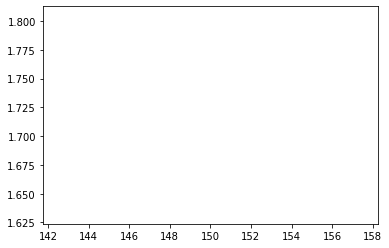

In [553]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss.item())
plt.show()

In [552]:
loss.item()

1.7183221578598022